
<a name="top"> <h1>3. FEATURE SELECTION</h1> <a>


<p>FALSOS REEMPLAZOS<br />
<strong>Price to Market Motor</strong><br />



<p style="text-align:right">Miguel D&iacute;az-Mauriño (<em>miguel.diaz@allianz.es</em>)</p>


# Setup notebooks

### General libraries

In [1]:
import os
import sys
import datetime
import numpy as np
import pandas as pd
from os.path import join

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.2f}'.format

### Logging

In [2]:
import logging

logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

### Load enviroment variables and adding to PYTHONPATH

In [3]:
from dotenv import load_dotenv
load_dotenv('.env')

code_root = os.environ['CODE_ROOT']
cfg_path = os.environ['CFG_PATH']
data_root = os.environ['DATA_ROOT']

sys.path.insert(0, code_root)

### Specific libraries

In [4]:
from src.utils import label_encode_variables
from src.load_functions import get_renames
from src.data_dict import formato, get_import_columns, get_dtypes_dict, get_rename_dict, date_format, get_features_model, get_features, get_feature_type

### Configuration dictionary

In [5]:
df = pd.read_parquet(os.path.join(data_root, 'FR_Tomador.parquet'))

df.head(5)

,POLIZA,APLICA,RAMO,prima_prop,PRIMA_ANT,PAQ_REPORTING,FRENOV,agrupacm,PRIMAN,MOTANUL,FANUL,FIANUL,CLASS_ANUL,Anulada,POLIZAN,APLICAN,CODPOST,POLIZAS_45,AGENTE,DC,SUCURSAL,USO,TOMADOR,TXCANAL,CODMEDP,CATTAG,AGRUPAGENTE,prima_reemplazante,prperiod,SINOCU,N_ANT,N_ACTUAL,Sdadpol_12M,DTO_DEFENSA,PRIMA_DEFENSA_ADPR,CORREDOR_PILOTO,sdad_total3p,sdad_total_tom,anualidad_seguro,Edad_conductor,APTP,rwCoeff_forced,retention,retention_def,Retencion_antes,TechPrice_x,num_stros_ultaño,num_stros_aga_ultaño,total_stros_ultaño,Valor_Mediador_Turismos,Prob_anul,CODMEDP_bnd,Prueba_Piloto_bnd,Super_rentables_bnd,Corredores_bnd,cltv_decile,Aleatorio,Segmentos_sept,segmento_deficiente_bnd,CAPTOTAL_vida,Edad_tomador_bnd,empleados,POL_VIDA,bm_anualidad,BM_cat,IsBMP,Random,Random_22,DEFENDIBLE,bm_ampliado,Stros2,CS,Provincia,m_anul,Sdadpol_12M_anterior,stros_anterior,defendida_SAS,defendida_ant,FR,priman_new_fr,POLIZAR,PAQUETE_REPORTING,paquete_reporting_reempl,polizar_post,tipo_reemplazo,FRFINAL,GARANTIA_1,GARANTIA_2,GARANTIA_3,GARANTIA_4,GARANTIA_5,GARANTIA_6,GARANTIA_7,GARANTIA_8,Gar_missing,MODALIDAD,SEX,ASISTENCIA,COND_TOM,COND_PROP,MATRICULA,CILIND,POTENCIA,CLASEVH,VALORVH,MARCA,MODELO,BASICO,ROBO,DANOS,FRANQUI,PAQUETE,PLAZAS,GRUA,NPROPIETARIO,ID_CLIENTE,FNACI8,FCARN8,FMATRI,ANTIG_VEHICULO,Actual_price,TechPrice_y
0,23175501,0,1265,608.47,568.66,211.00,2023-01-03,1020,"608,47",None,None,None,None,0,0.00,0.00,"18,006.00",1,28062,29,519,11000,13379484,Agente,"28,062.00",-Ninguno,None,"0,00","549,10","0,00",1,1,-69.33,0,0.00,0,-23.30,-14.83,15.00,77.00,Menor 160%,NaN,0.73,0.92,0.77,374.06,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,8.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,None,NaN,None,9,18,NaN,0.00,0.00,N,N,NaN,None,0,211-Todo Riesgo con Franquicia,None,0,None,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.00,Hombre,S,S,S,0669GBF,"1,560.00",90.00,TURISMO,"19,100.00",PEUGEOT,308 CONFORT 1.6 HDI 90 5P,S,S,S,S,4,5.00,None,"13,379,484.00","13,379,484.00",1946-07-20,1968-02-02,2008-02-01,15.00,"608,47","338,95619130502109"
1,23176348,0,1269,229.09,210.18,112.00,2023-01-03,1020,"229,09",None,None,None,None,0,0.00,0.00,"13,360.00",1,6150157,26,615,11200,14236689,Corredor,"6,150,157.00",3-Corredor FIRST,None,"0,00","206,10","0,00",1,1,0.00,0,0.00,0,0.00,0.00,15.00,62.00,Menor 130%,NaN,0.77,0.90,0.81,162.69,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,5.00,Sí,NaN,Resto,None,None,None,None,None,None,None,None,None,None,NaN,None,9,13,NaN,0.00,0.00,N,S,NaN,None,0,112-Basico,None,0,None,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.00,Hombre,S,S,S,8362CBW,"1,870.00",80.00,VEHIC. COMERCIAL H. 3500 KG,"16,626.00",RENAULT,KANGOO COMBI EXPRE 1.9DCI,S,N,N,N,1,5.00,None,"14,236,689.00","14,236,689.00",1961-07-03,1984-04-11,2002-11-01,21.00,"229,09","136,73620661346894"
2,23176709,0,1269,335.54,319.56,112.00,2023-01-02,1020,"335,54",E-DENUNCIADA: POR EL CONTRATANTE,01/02/2024,04/10/2023,None,0,0.00,0.00,"3,177.00",1,3351901,28,335,11000,92480610,Agente,"3,351,901.00",V-Agente excelente a¦o en curso,None,"0,00","305,68","0,00",1,1,0.00,0,0.00,0,0.00,0.00,15.00,81.00,Menor 250%,NaN,0.73,0.77,0.75,136.35,0.00,0.00,0.00,N,Media,Resto,1.00,SRentables,Resto,8.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,None,NaN,None,None,3,8.00,0.00,0.00,N,N,NaN,None,0,112-Basico,None,0,None,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.00,Hombre,S,S,S,2939GBG,"1,196.00",45.00,TURISMO,"8,882.00",OPEL,CORSA 1.2 3P 45CV,S,N,N,N,1,5.00,None,"92,480,610.00","92,480,610.00",1942-04-08,1960-05-10,1993-10-01,15.00,"319,56","181,74392659731978"
3,23177191,0,1269,332.16,266.06,121.00,2023-01-03,1020,"332,16",None,None,None,None,0,0.00,0.00,"32,800.00",1,5330218,21,470,11000,92733813,Agente,"5,330,218.00",V-Agente excelente a¦o en curso,None,"0,00","292,58","0,00",1,2,399.38,0,0.00,0,191.32,55.40,15.00,66.00,Menor 190%,NaN,0.64,0.68,0.77,140.59,1.00,1.00,2.00,N,Media,Resto,1.00,Resto,Resto,8.00,Sí,NaN,Resto,None,None,None,None,None,None,None,None,None,None,NaN,None,None,32

In [6]:
df = formato(df)

In [7]:
import_cols = get_import_columns(df)
df = df[import_cols]

110


In [8]:
df.head(2)

,POLIZA,APLICA,RAMO,prima_prop,PRIMA_ANT,PAQ_REPORTING,FRENOV,agrupacm,PRIMAN,FANUL,FIANUL,POLIZAN,APLICAN,AGENTE,DC,SUCURSAL,USO,TOMADOR,TXCANAL,CATTAG,AGRUPAGENTE,prima_reemplazante,prperiod,SINOCU,N_ANT,N_ACTUAL,Sdadpol_12M,DTO_DEFENSA,PRIMA_DEFENSA_ADPR,CORREDOR_PILOTO,sdad_total3p,sdad_total_tom,anualidad_seguro,Edad_conductor,APTP,rwCoeff_forced,retention,retention_def,Retencion_antes,TechPrice_x,num_stros_ultaño,num_stros_aga_ultaño,total_stros_ultaño,Valor_Mediador_Turismos,Prob_anul,CODMEDP_bnd,Prueba_Piloto_bnd,Super_rentables_bnd,Corredores_bnd,cltv_decile,Aleatorio,Segmentos_sept,segmento_deficiente_bnd,CAPTOTAL_vida,Edad_tomador_bnd,empleados,POL_VIDA,bm_anualidad,BM_cat,Random,Random_22,DEFENDIBLE,bm_ampliado,Stros2,CS,Provincia,Sdadpol_12M_anterior,stros_anterior,defendida_SAS,defendida_ant,FR,POLIZAR,PAQUETE_REPORTING,paquete_reporting_reempl,polizar_post,tipo_reemplazo,FRFINAL,GARANTIA_1,GARANTIA_2,GARANTIA_3,GARANTIA_4,GARANTIA_5,GARANTIA_6,GARANTIA_7,GARANTIA_8,Gar_missing,SEX,ASISTENCIA,COND_TOM,COND_PROP,MATRICULA,CILIND,POTENCIA,CLASEVH,VALORVH,MARCA,MODELO,ROBO,DANOS,FRANQUI,PAQUETE,PLAZAS,GRUA,ID_CLIENTE,FNACI8,FCARN8,FMATRI,ANTIG_VEHICULO,Actual_price,TechPrice_y
0,23175501,0,1265,608.47,568.66,211.00,2023-01-03,1020,608.47,NaT,NaT,0,0,28062,29,519,11000,13379484,Agente,-Ninguno,None,0.00,549.10,0.00,1,1,-69.33,0,0.00,0,-23.30,-14.83,15.00,77.00,Menor 160%,NaN,0.73,0.92,0.77,374.06,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,8.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,9,18,0.00,0.00,N,N,NaN,0,211-Todo Riesgo con Franquicia,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Hombre,S,S,S,0669GBF,"1,560.00",90.00,TURISMO,"19,100.00",PEUGEOT,308 CONFORT 1.6 HDI 90 5P,S,S,S,4,5.00,None,"13,379,484.00",1946-07-20,1968-02-02,2008-02-01,15,608.47,338.95619130502109
1,23176348,0,1269,229.09,210.18,112.00,2023-01-03,1020,229.09,NaT,NaT,0,0,6150157,26,615,11200,14236689,Corredor,3-Corredor FIRST,None,0.00,206.10,0.00,1,1,0.00,0,0.00,0,0.00,0.00,15.00,62.00,Menor 130%,NaN,0.77,0.90,0.81,162.69,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,5.00,Sí,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,9,13,0.00,0.00,N,S,NaN,0,112-Basico,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Hombre,S,S,S,8362CBW,"1,870.00",80.00,VEHIC. COMERCIAL H. 3500 KG,"16,626.00",RENAULT,KANGOO COMBI EXPRE 1.9DCI,N,N,N,1,5.00,None,"14,236,689.00",1961-07-03,1984-04-11,2002-11-01,21,229.09,136.73620661346894


In [9]:
data_types = get_dtypes_dict(df)
df = df.astype(data_types)

In [10]:
get_rename_dict(df)
df= df.rename(columns=get_rename_dict(df))

In [11]:
categorical_features = get_features(df, FEATURE_TYPE = "Cat")
len(categorical_features)

62

In [12]:
numerical_features = get_features(df, FEATURE_TYPE = "Num")
len(numerical_features)

34

In [13]:
feature_types  = get_feature_type(df)

In [14]:
df = date_format(df, feature_types)

In [15]:
df.head(5)

,Poliza,Aplica,Ramo,Prima_Prop,Prima_Ant,Paq_Reporting,Frenov,Agrupacm,Priman,Fanul,Fianul,Polizan,Aplican,Agente,DC,Sucursal,Uso,Tomador,Txcanal,Cattag,Agrupagente,Prima_Reemplazante,Prperiod,Sinocu,N_Ant,N_Actual,Sdadpol_12m,Dto_Defensa,Prima_Defensa_Adpr,Corredor_Piloto,Sdad_Total3p,Sdad_Total_Tom,Anualidad_Seguro,Edad_Conductor,APTP,Rwcoeff_Forced,Retention,Retention_Def,Retencion_Antes,Tech_Price_x,Num_Stros_Ult_Año,Num_Stros_Aga_Ult_Año,Total_Stros_Ult_Año,Valor_Mediador_Turismos,Prob_Anul,Codmedp_Bnd,Prueba_Piloto_Bnd,Super_Rentables_Bnd,Corredores_Bnd,Cltv_Decile,Aleatorio,Segmentos_Sept,Segmento_Deficiente_Bnd,Captotal_Vida,Edad_Tomador_Bnd,Empleados,Pol_Vida,Bm_Anualidad,Bm_Cat,Random,Random_22,Defendible,Bm_Ampliado,Stros2,CS,Provincia,Sdadpol_12m_Anterior,Stros_Anterior,Defendida_SAS,Defendida_Ant,FR,Polizar,Paquete_Reporting,Paquete_Reporting_Reempl,Polizar_Post,Tipo_Reemplazo,FRFINAL,Garantia_1,Garantia_2,Garantia_3,Garantia_4,Garantia_5,Garantia_6,Garantia_7,Garantia_8,Missing_Garantia,Sexo,Asistencia,Cond_Tom,Cond_Prop,Matricula,Cilindrada,Potencia,Clase_Vh,Valor_Vh,Marca,Modelo,Robo,Danos,Franquicia,Paquete,Plazas,Grua,ID_Cliente,Fecha_Nacimiento,Fecha_Carnet,Fecha_Matriculacion,Antiguedad_Vehiculo,Actual_price,TechPrice
0,23175501,0,1265,608.47,568.66,211.00,2023-01-03,1020,608.47,NaT,NaT,0,0,28062,29,519,11000,13379484,Agente,-Ninguno,None,0.00,549.10,0.00,1,1,-69.33,0,0.00,0,-23.30,-14.83,15.00,77.00,Menor 160%,NaN,0.73,0.92,0.77,374.06,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,8.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,9,18,0.00,0.00,N,N,NaN,0,211-Todo Riesgo con Franquicia,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Hombre,S,S,S,0669GBF,1560,90,TURISMO,19100,PEUGEOT,308 CONFORT 1.6 HDI 90 5P,S,S,S,4,5,None,13379484,1946-07-20,1968-02-02,2008-02-01,15,608.47,338.96
1,23176348,0,1269,229.09,210.18,112.00,2023-01-03,1020,229.09,NaT,NaT,0,0,6150157,26,615,11200,14236689,Corredor,3-Corredor FIRST,None,0.00,206.10,0.00,1,1,0.00,0,0.00,0,0.00,0.00,15.00,62.00,Menor 130%,NaN,0.77,0.90,0.81,162.69,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,5.00,Sí,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,9,13,0.00,0.00,N,S,NaN,0,112-Basico,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Hombre,S,S,S,8362CBW,1870,80,VEHIC. COMERCIAL H. 3500 KG,16626,RENAULT,KANGOO COMBI EXPRE 1.9DCI,N,N,N,1,5,None,14236689,1961-07-03,1984-04-11,2002-11-01,21,229.09,136.74
2,23176709,0,1269,335.54,319.56,112.00,2023-01-02,1020,335.54,2024-01-02,2023-04-10,0,0,3351901,28,335,11000,92480610,Agente,V-Agente excelente a¦o en curso,None,0.00,305.68,0.00,1,1,0.00,0,0.00,0,0.00,0.00,15.00,81.00,Menor 250%,NaN,0.73,0.77,0.75,136.35,0.00,0.00,0.00,N,Media,Resto,1.00,SRentables,Resto,8.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,None,3,0.00,0.00,N,N,NaN,0,112-Basico,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Hombre,S,S,S,2939GBG,1196,45,TURISMO,8882,OPEL,CORSA 1.2 3P 45CV,N,N,N,1,5,None,92480610,1942-04-08,1960-05-10,1993-10-01,15,319.56,181.74
3,23177191,0,1269,332.16,266.06,121.00,2023-01-03,1020,332.16,NaT,NaT,0,0,5330218,21,470,11000,92733813,Agente,V-Agente excelente a¦o en curso,None,0.00,292.58,0.00,1,2,399.38,0,0.00,0,191.32,55.40,15.00,66.00,Menor 190%,NaN,0.64,0.68,0.77,140.59,1.00,1.00,2.00,N,Media,Resto,1.00,Resto,Resto,8.00,Sí,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,None,32,0.00,0.00,N,N,NaN,0,121-Basico + Robo,None,0,None,0.00,0,0,0,0,0,0,0,0,8,Mujer,S,S,S,OU0851S,1124,60,TURISMO,8760,PEUGEOT,205 MITO 1.1 5P 60CV,S,N,N,2,5,None,92733813,1957-09-28,1989-04-11,1996-01-01,28,332.16,175.29
4,23177248,0,1269,263.26,246.04,112.00,2023-01-03,1020,263.26,NaT,NaT,0,0,27138,22,543,11000,92080298,Corredor,P-Corredor PLUS,89-CONDICIONES ESPECIALES DEFENSA CARTERA,0.00,237.57,0.00,1,1,0.00,0,0.00,0,0.00,0.00,15.00,76.00,Menor 200%,NaN,0.75,0.89,0.80,127.77,0.00,0.00,0.00,N,Media,Resto,1.00,Resto,Resto,5.00,No,NaN,Resto,None,None,None,None,None,None,None,None,None,NaN,None,None,5,0

In [16]:
df['APTP_vf'] = df.Actual_price/df.TechPrice
df['APTP_vf'] = df['APTP_vf'].round(2)
df['APTP_vf'] = df['APTP_vf'].replace([np.inf, -np.inf], 0.00)
df[['Poliza', 'APTP', 'Actual_price', 'TechPrice', 'APTP_vf']]

,Poliza,APTP,Actual_price,TechPrice,APTP_vf
0,23175501,Menor 160%,608.47,338.96,1.80
1,23176348,Menor 130%,229.09,136.74,1.68
2,23176709,Menor 250%,319.56,181.74,1.76
3,23177191,Menor 190%,332.16,175.29,1.89
4,23177248,Menor 200%,263.26,136.20,1.93
...,...,...,...,...,...
1841790,54403949,None,270.23,215.55,1.25
1841791,54405353,None,706.12,521.18,1.35
1841792,54406429,None,462.26,584.22,0.79
1841793,54406914,None,362.74,237.60,1.53


In [17]:
numerical_features.append('APTP_vf')

In [18]:
selected_features = categorical_features + numerical_features
len(selected_features)

97

### Correlación

In [19]:
correlation_matrix = df[numerical_features].corr()
correlation_matrix

,Prima_Prop,Prima_Ant,Priman,Prima_Reemplazante,Prperiod,Sinocu,Sdadpol_12m,Prima_Defensa_Adpr,Sdad_Total3p,Sdad_Total_Tom,Edad_Conductor,Retention,Retention_Def,Retencion_Antes,Tech_Price_x,Num_Stros_Ult_Año,Num_Stros_Aga_Ult_Año,Total_Stros_Ult_Año,Sdadpol_12m_Anterior,Garantia_1,Garantia_2,Garantia_3,Garantia_4,Garantia_5,Garantia_6,Garantia_7,Garantia_8,Cilindrada,Potencia,Valor_Vh,Plazas,Antiguedad_Vehiculo,Actual_price,TechPrice,APTP_vf
Prima_Prop,1.00,0.99,0.99,NaN,0.82,0.04,0.01,0.17,0.09,0.08,-0.06,-0.41,-0.24,-0.38,0.81,0.19,0.05,0.14,0.02,-0.01,0.09,0.14,0.11,0.22,0.39,NaN,NaN,0.18,0.43,0.45,0.03,-0.25,1.00,0.82,0.15
Prima_Ant,0.99,1.00,0.98,NaN,0.84,0.03,0.00,0.19,0.05,0.05,-0.05,-0.35,-0.18,-0.35,0.77,0.14,0.02,0.09,0.01,-0.01,0.08,0.13,0.11,0.23,0.38,NaN,NaN,0.18,0.44,0.46,0.03,-0.25,0.98,0.79,0.18
Priman,0.99,0.98,1.00,NaN,0.83,0.04,0.01,0.13,0.09,0.08,-0.06,-0.40,-0.25,-0.37,0.81,0.20,0.05,0.15,0.02,-0.01,0.07,0.12,0.10,0.21,0.39,NaN,NaN,0.18,0.43,0.45,0.03,-0.25,1.00,0.82,0.14
Prima_Reemplazante,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Prperiod,0.82,0.84,0.83,NaN,1.00,0.03,-0.00,0.21,0.04,0.03,-0.02,-0.09,-0.07,-0.09,0.63,0.11,-0.00,0.06,0.01,-0.02,0.02,0.11,0.09,0.21,0.33,NaN,NaN,0.16,0.39,0.42,0.03,-0.23,0.83,0.64,0.19
Sinocu,0.04,0.03,0.04,NaN,0.03,1.00,0.17,-0.00,0.04,0.04,-0.00,-0.01,-0.02,-0.00,0.04,0.05,0.01,0.04,0.00,-0.00,0.00,0.01,0.00,0.01,0.02,NaN,NaN,0.00,0.02,0.02,0.00,-0.02,0.04,0.05,-0.02
Sdadpol_12m,0.01,0.00,0.01,NaN,-0.00,0.17,1.00,-0.02,0.17,0.13,-0.01,-0.03,-0.05,-0.01,0.02,0.16,0.04,0.12,0.00,-0.00,-0.00,0.00,0.00,0.01,0.00,NaN,NaN,-0.00,0.01,0.01,0.00,-0.01,0.01,0.04,-0.04
Prima_Defensa_Adpr,0.17,0.19,0.13,NaN,0.21,-0.00,-0.02,1.00,-0.06,-0.05,-0.01,0.08,0.22,0.06,0.02,-0.07,-0.07,-0.09,-0.02,-0.02,0.01,0.06,0.04,0.11,0.05,NaN,NaN,0.05,0.13,0.14,0.01,-0.07,0.13,0.05,0.09
Sdad_Total3p,0.09,0.05,0.09,NaN,0.04,0.04,0.17,-0.06,1.00,0.54,-0.02,-0.13,-0.16,-0.05,0.14,0.43,0.07,0.29,0.21,-0.01,0.02,0.02,0.01,0.04,0.03,NaN,NaN,0.01,0.03,0.03,0.01,-0.05,0.09,0.16,-0.13
Sdad_Total_Tom,0.08,0.05,0.08,NaN,0.03,0.04,0.13,-0.05,0.54,1.00,-0.02,-0.10,-0.14,-0.04,0.13,0.26,0.07,0.20,0.13,-0.00,0.04,0.02,0.01,0.04,0.02,NaN,NaN,0.01,0.03,0.03,0.00,-0.04,0.08,0.14,-0.12


In [20]:
df2 = pd.DataFrame(correlation_matrix.unstack(), columns=["Correlation"])
df2 = df2[~(df2["Correlation"] == 1)].abs().sort_values(by="Correlation", ascending=False)
df2.head(20)

,,Correlation
Prima_Prop,Actual_price,1.00
Actual_price,Prima_Prop,1.00
Priman,Actual_price,1.00
Actual_price,Priman,1.00
Prima_Prop,Priman,0.99
Priman,Prima_Prop,0.99
Prima_Ant,Prima_Prop,0.99
Prima_Prop,Prima_Ant,0.99
Actual_price,Prima_Ant,0.98
Prima_Ant,Actual_price,0.98


In [21]:
df2[df2.Correlation >= 0.85]

,,Correlation
Prima_Prop,Actual_price,1.00
Actual_price,Prima_Prop,1.00
Priman,Actual_price,1.00
Actual_price,Priman,1.00
Prima_Prop,Priman,0.99
Priman,Prima_Prop,0.99
Prima_Ant,Prima_Prop,0.99
Prima_Prop,Prima_Ant,0.99
Actual_price,Prima_Ant,0.98
Prima_Ant,Actual_price,0.98


#### Eliminación de variables en base a la CORR

In [22]:
# Lista de columnas para eliminar
columns_to_drop = ['Prima_Prop', 'Prima_Ant', 'Prperiod', 'Retencion_Antes', 'Retention_Def', 'Potencia', 'Tech_Price_x']

# Numerical
numerical_features_1 = [column for column in numerical_features if column not in columns_to_drop]

if len(numerical_features_1) == len(numerical_features):
    print("All columns to drop are present in numerical_features.")
else:
    removed_columns = [column for column in numerical_features if column in columns_to_drop]
    print(f"{removed_columns} has been removed in numerical_features.")

# Categorical
categorical_features_1 = [column for column in categorical_features if column not in columns_to_drop]

if len(categorical_features_1) == len(categorical_features):
    print("All columns to drop are present in categorical_features.")
else:
    removed_columns = [column for column in categorical_features if column in columns_to_drop]
    print(f"{removed_columns} has been removed in categorical_features.")

# Eliminar las columnas
df = df.drop(columns_to_drop, axis=1)

['Prima_Prop', 'Prima_Ant', 'Prperiod', 'Retention_Def', 'Retencion_Antes', 'Tech_Price_x', 'Potencia'] has been removed in numerical_features.
All columns to drop are present in categorical_features.


### Valores NaN

In [23]:
# Supongamos que df es tu DataFrame original
nan_counts = df.isna().sum()
# Convierte la serie en un DataFrame
nan_counts_df = pd.DataFrame(nan_counts, columns=['Number of NaN'])
# Calcula el porcentaje y crea una nueva columna
nan_counts_df['Percentage'] = nan_counts_df['Number of NaN'] / len(df) * 100
nan_counts_df['Percentage'] = nan_counts_df['Percentage'].round()

nan_counts_df.sort_values(by='Number of NaN', ascending=False).head(20)

,Number of NaN,Percentage
Segmentos_Sept,1582937,100.00
Tipo_Reemplazo,1581869,100.00
Paquete_Reporting_Reempl,1581866,100.00
Grua,1581796,100.00
FR,1566129,99.00
Rwcoeff_Forced,1464643,93.00
Bm_Ampliado,1461801,92.00
Random_22,1457503,92.00
Fianul,1381187,87.00
Danos,1373386,87.00


#### Valores NaN en Numericas

In [24]:
nan_counts1 = df[numerical_features_1].isna().sum()

nan_counts_df1 = pd.DataFrame(nan_counts1, columns=['Number of NaN'])
# Calcula el porcentaje 
nan_counts_df1['Percentage'] = nan_counts_df1['Number of NaN'] / len(df) * 100
nan_counts_df1['Percentage'] = nan_counts_df1['Percentage'].round()

nan_counts_df1.sort_values(by='Number of NaN', ascending=False).head(20)

,Number of NaN,Percentage
Retention,1076739,68.00
Sdadpol_12m_Anterior,371149,23.00
Edad_Conductor,11038,1.00
Sdad_Total3p,9371,1.00
Sdad_Total_Tom,5523,0.00
Num_Stros_Ult_Año,3484,0.00
Total_Stros_Ult_Año,3484,0.00
Num_Stros_Aga_Ult_Año,3484,0.00
Priman,1553,0.00
Garantia_6,0,0.00


#### Reemplazamos valores nulos por la mediana

In [25]:
df[numerical_features_1] = df[numerical_features_1].fillna(df[numerical_features_1].median())

#### Valores NaN en Categoricas

In [26]:
nan_counts2 = df[categorical_features_1].isna().sum()

nan_counts_df2 = pd.DataFrame(nan_counts2, columns=['Number of NaN'])
# Calcula el porcentaje
nan_counts_df2['Percentage'] = nan_counts_df2['Number of NaN'] / len(df) * 100
nan_counts_df2['Percentage'] = nan_counts_df2['Percentage'].round()

nan_counts_df2.sort_values(by='Number of NaN', ascending=False).head(20)

,Number of NaN,Percentage
Segmentos_Sept,1582937,100.00
Tipo_Reemplazo,1581869,100.00
Paquete_Reporting_Reempl,1581866,100.00
Grua,1581796,100.00
FR,1566129,99.00
Rwcoeff_Forced,1464643,93.00
Bm_Ampliado,1461801,92.00
Random_22,1457503,92.00
Robo,1373386,87.00
Danos,1373386,87.00


#### Eliminación de variables en base a NaN

In [27]:
# Lista de columnas para eliminar
columns_to_drop_1 = ['Segmentos_Sept', 'Random_22', 'Random', 'FR', 'Grua', 'Tipo_Reemplazo', 'Paquete_Reporting_Reempl']

# Numerical
numerical_features_2 = [column for column in numerical_features_1 if column not in columns_to_drop_1]

if len(numerical_features_2) == len(numerical_features_1):
    print("All columns to drop are present in numerical_features.")
else:
    removed_columns = [column for column in numerical_features_1 if column in columns_to_drop_1]
    print(f"{removed_columns} has been removed in numerical_features.")

# Categorical
categorical_features_2 = [column for column in categorical_features_1 if column not in columns_to_drop_1]

if len(categorical_features_2) == len(categorical_features_1):
    print("All columns to drop are present in categorical_features.")
else:
    removed_columns = [column for column in categorical_features_1 if column in columns_to_drop_1]
    print(f"{removed_columns} has been removed in categorical_features.")

# Eliminar las columnas
df = df.drop(columns_to_drop_1, axis=1)

All columns to drop are present in numerical_features.
['Segmentos_Sept', 'Random', 'Random_22', 'FR', 'Paquete_Reporting_Reempl', 'Tipo_Reemplazo', 'Grua'] has been removed in categorical_features.


In [28]:
print(len(categorical_features_1))
print(len(categorical_features_2))

62
55


#### Creamos valor '999' para reemplazar valores nulos

In [29]:
df['Defendible'] = df['Defendible'].fillna('N')
df['Empleados'] = df['Empleados'].fillna('Resto')
df['Captotal_Vida'] = df['Captotal_Vida'].fillna('Resto')

df['Anualidad_Seguro'] = df['Anualidad_Seguro'].fillna(999.0)
df['Rwcoeff_Forced'] = df['Rwcoeff_Forced'].fillna(999.0)
df['Prueba_Piloto_Bnd'] = df['Prueba_Piloto_Bnd'].fillna(999.0)
df['Cltv_Decile'] = df['Cltv_Decile'].fillna(999.0)
df['Bm_Ampliado'] = df['Bm_Ampliado'].fillna(999.0)
df['Stros_Anterior'] = df['Stros_Anterior'].fillna(999.0)

In [30]:
df[categorical_features_2] = df[categorical_features_2].fillna('999 - NaN')

#### Guardar PQ

In [46]:
df.to_parquet(os.path.join(data_root, "202312_FR_BBDD.pq"))
df.to_csv(os.path.join(data_root, "202312_FR_BBDD.csv"))

## Feature Importance

In [32]:
selected_features_2 = numerical_features_2 + categorical_features_2

In [39]:
def get_fit_data(df, feature_columns, categorical_features, target, train_indexes, train_db: bool = True,):
    # Transform categorical features to category type
    if len(categorical_features) > 0:
        logging.info("Astype categoricals.")
        df[categorical_features] = df[categorical_features].astype("category")

    # cast numerical
    numerical_features = [i for i in feature_columns if i not in categorical_features]

    logging.info("Astype numericals.")
    for col in numerical_features:
        df[col] = pd.to_numeric(df[col])

    # Remove any rows from fit that have missing targets
    logging.info(f"Returning {len(train_indexes)} rows.")
    if train_db:
        return (
            df.loc[df.index.isin(train_indexes), feature_columns],
            df.loc[df.index.isin(train_indexes), target],
        )

    return df.loc[df.index.isin(train_indexes), feature_columns]

In [44]:
import gc
from sklearn.model_selection import train_test_split
import logging

def run_feature_selection_pipeline(df, model_tgt, feature_columns, categorical_features, model_type, numerical_features, 
                                   iterations, global_min_importance, local_min_importance, random_state, exclude):
    tgt = f"{model_tgt}"

    X, y = get_fit_data(df, feature_columns, categorical_features, tgt, df.index)

    del df
    gc.collect()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=random_state
    )

    del X, y, X_test, y_test
    gc.collect()

    logger = logging.getLogger(__name__)
    logger.info(f"Using {X_train.shape} rows to select the features")

    regressor = create_model(model_type)

    flow = create_pipeline(regressor, numerical_features, categorical_features)

    df_features, selected_features = iterate_feature_selection(
        X_train,
        y_train,
        flow,
        iterations,
        numerical_features,
        categorical_features,
        global_min_importance,
        local_min_importance,
    )

    del X_train, y_train
    gc.collect()

    parameters_feat = {
        "iterations": iterations,
        "global_min_importance": global_min_importance,
        "local_min_importance": local_min_importance,
        "random_state": random_state,
        "exclude": exclude,
    }

    logger.info(f"Parameters used: {parameters_feat}")

    return df_features, selected_features, parameters_feat, model_type

In [45]:
df_features, selected_features, parameters_feat, model_type = run_feature_selection_pipeline(df = df, model_tgt = 'FRFINAL', 
                                                                                             feature_columns = selected_features_2, 
                                                                                             categorical_features = categorical_features_2, 
                                                                                             model_type = 'LILGBMClassifierGHTGBM', 
                                                                                             numerical_features = numerical_features_2, 
                                                                                             iterations = 5, global_min_importance= 0.1,
                                                                                             local_min_importance = 0.1, random_state = 42, 
                                                                                             exclude = 'test1')

2024-03-07 11:55:23,703 - Astype categoricals.
2024-03-07 11:55:23,797 - Astype numericals.
2024-03-07 11:55:23,862 - Returning 1582937 rows.
2024-03-07 11:55:24,749 - Using (1266349, 83) rows to select the features


NameError: name 'create_model' is not defined

In [ ]:
df_features, selected_features, parameters_feat = get_feature_selection(raw_df = df,
                                                            feature_columns = selected_features_2,
                                                            categorical_features = categorical_features2,
                                                            numerical_features = numerical_features2)

In [32]:
categorical_columns = categorical_features.remove('FRFINAL')

In [33]:
DF = df[selected_features_2].copy()

In [34]:
DF.FRFINAL.unique()

array([0., 1.])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9910, number of negative: 1256439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20730
[LightGBM] [Info] Number of data points in the train set: 1266349, number of used features: 75
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.007826 -> initscore=-4.842492
[

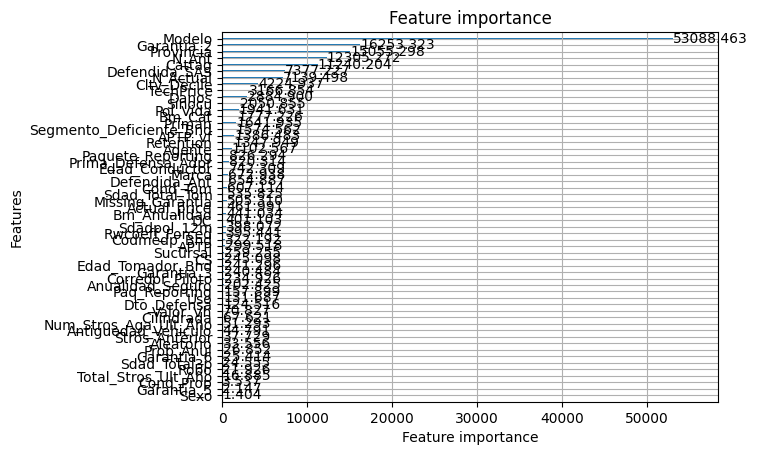

In [35]:
top_30_features, df_selected = lgbm_feature_importance(DF, "FRFINAL")

In [36]:
top_30_features.head(10)

,Value,Feature
81,561,Modelo
80,167,Provincia
79,102,Garantia_2
78,57,TechPrice
77,56,APTP_vf
76,45,Marca
75,42,Defendida_SAS
74,41,Agente
73,40,Cltv_Decile
72,39,N_Ant


<Axes: xlabel='Value', ylabel='Feature'>

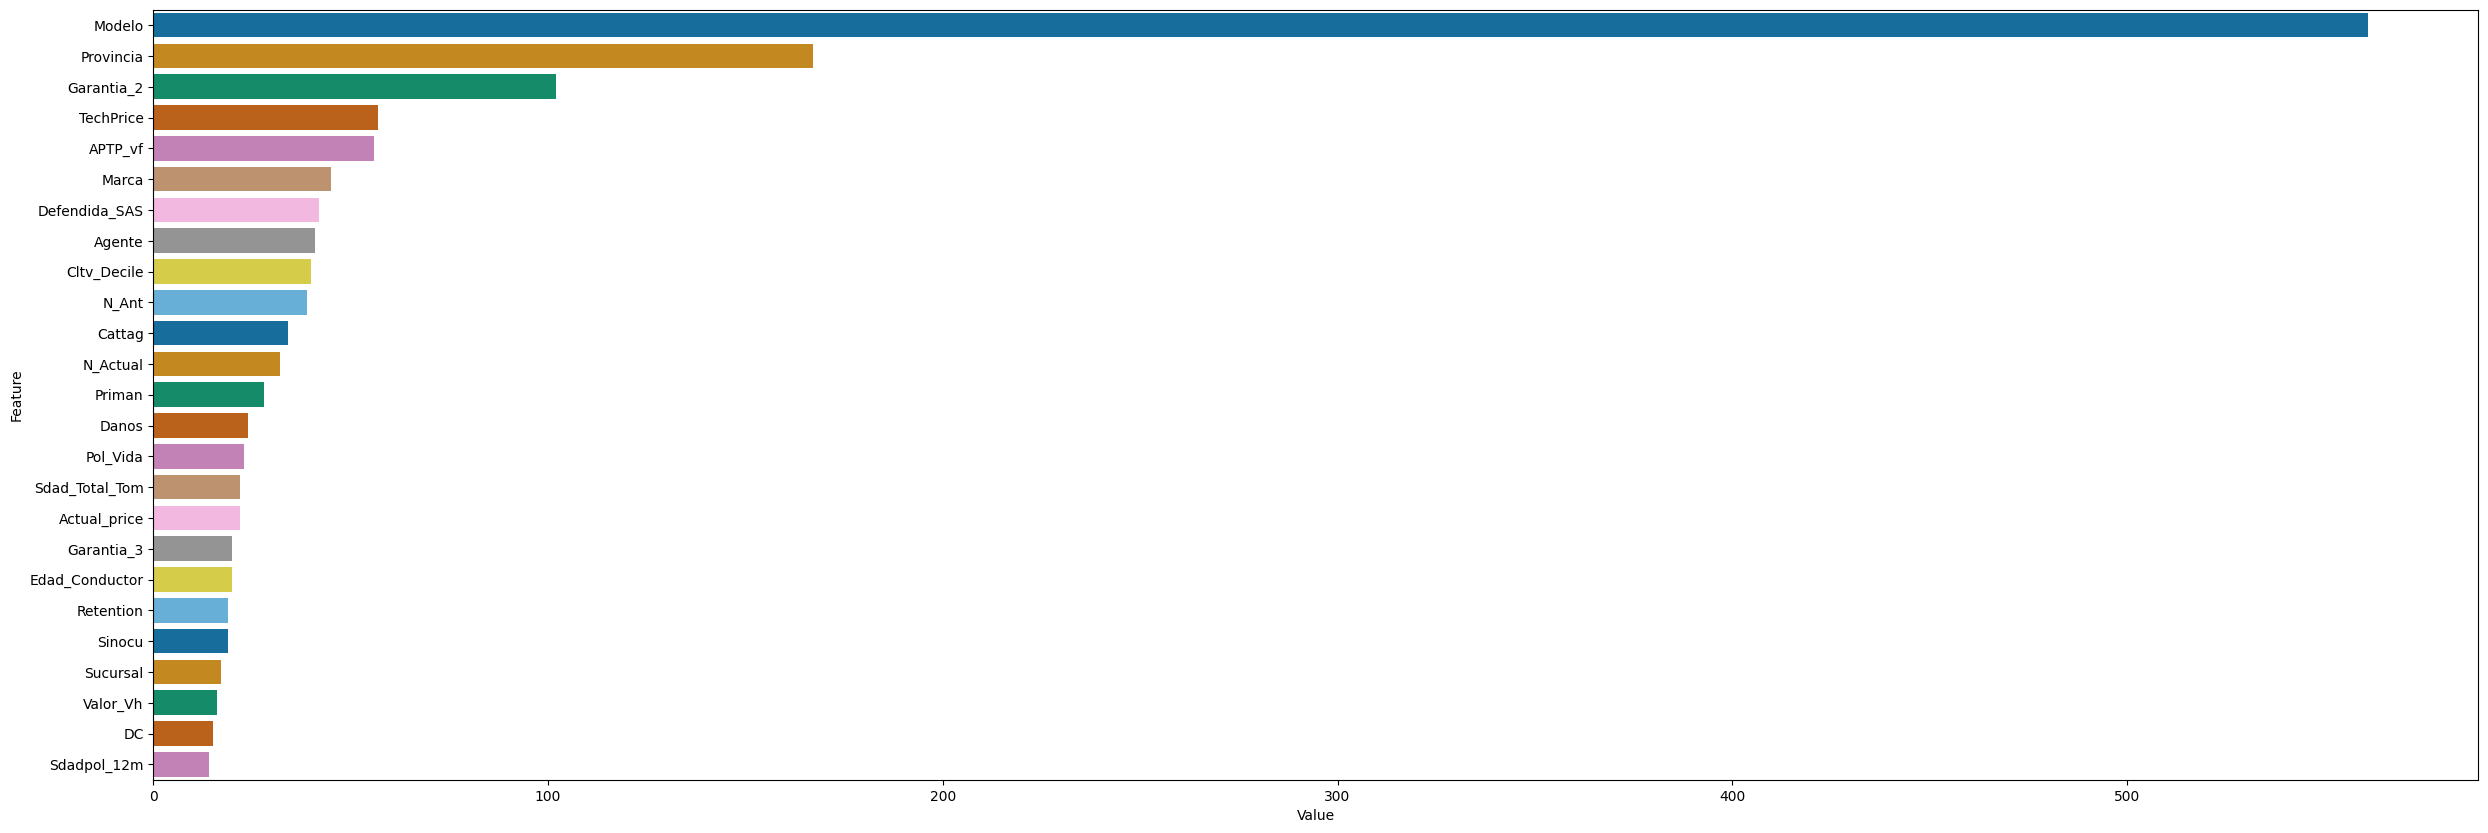

In [37]:
# Create a  graph with the importance of the variables using seaborn.

plt.rcParams['figure.figsize'] = (30, 10)

# horizontal barplot, sort ascending and change the color

sns.barplot(y = 'Feature', x = 'Value', data = top_30_features.sort_values(by = 'Value', ascending = False), palette = 'colorblind')

# Decision Tree

In [38]:
columns_to_select = list(set(df_selected.columns).intersection(categorical_features_2))
categorical_vars = df_selected[columns_to_select].columns.tolist()
categorical_vars

['Defendida_SAS',
 'N_Actual',
 'Sucursal',
 'Cltv_Decile',
 'Cattag',
 'Marca',
 'Modelo',
 'Danos',
 'Provincia',
 'N_Ant',
 'DC',
 'Pol_Vida',
 'Agente']

#### Convertir a numericas las categoricas

In [41]:
df_encoded = label_encode_variables(df_selected, categorical_vars)
df_encoded.head(5)

,Modelo,Provincia,Garantia_2,TechPrice,APTP_vf,Marca,Defendida_SAS,Agente,Cltv_Decile,N_Ant,Cattag,N_Actual,Priman,Danos,Pol_Vida,Sdad_Total_Tom,Actual_price,Garantia_3,Edad_Conductor,Retention,Sinocu,Sucursal,Valor_Vh,DC,Sdadpol_12m,Defendida_SAS_LabelEncoded,N_Actual_LabelEncoded,Sucursal_LabelEncoded,Cltv_Decile_LabelEncoded,Cattag_LabelEncoded,Marca_LabelEncoded,Modelo_LabelEncoded,Danos_LabelEncoded,Provincia_LabelEncoded,N_Ant_LabelEncoded,DC_LabelEncoded,Pol_Vida_LabelEncoded,Agente_LabelEncoded
0,308 CONFORT 1.6 HDI 90 5P,18,0,338.956191,1.80,PEUGEOT,N,28062,8.0,1,-Ninguno,1,608.47,S,999 - NaN,-14.83,608.47,0,77.0,0.731381,0.0,519,19100,29,-69.33,1,1,28,7,0,246,2673,2,17,1,7,0,2277
1,KANGOO COMBI EXPRE 1.9DCI,13,0,136.736207,1.68,RENAULT,N,6150157,5.0,1,3-Corredor FIRST,1,229.09,N,999 - NaN,0.00,229.09,0,62.0,0.769500,0.0,615,16626,26,0.00,1,1,47,4,2,266,28493,1,12,1,4,0,8640
2,CORSA 1.2 3P 45CV,3,0,181.743927,1.76,OPEL,N,3351901,8.0,1,V-Agente excelente a¦o en curso,1,335.54,N,999 - NaN,0.00,319.56,0,81.0,0.727529,0.0,335,8882,28,0.00,1,1,12,7,10,241,17110,1,29,1,6,0,6652
3,205 MITO 1.1 5P 60CV,32,0,175.290616,1.89,PEUGEOT,N,5330218,8.0,1,V-Agente excelente a¦o en curso,2,332.16,N,999 - NaN,55.40,332.16,0,66.0,0.644581,0.0,470,8760,21,399.38,1,2,18,7,10,246,1077,1,31,1,0,0,7807
4,PATROL 2.8 D (4C) FURG 75,5,0,136.203342,1.93,NISSAN,N,27138,5.0,1,P-Corredor PLUS,1,263.26,N,999 - NaN,0.00,263.26,0,76.0,0.752825,0.0,543,10980,22,0.00,1,1,36,4,9,237,36550,1,49,1,1,0,2147


In [42]:
df_encoded_VF = df_encoded.copy()
df_encoded_VF = df_encoded_VF.drop(categorical_vars, axis=1)
df_encoded_VF

,Garantia_2,TechPrice,APTP_vf,Priman,Sdad_Total_Tom,Actual_price,Garantia_3,Edad_Conductor,Retention,Sinocu,Valor_Vh,Sdadpol_12m,Defendida_SAS_LabelEncoded,N_Actual_LabelEncoded,Sucursal_LabelEncoded,Cltv_Decile_LabelEncoded,Cattag_LabelEncoded,Marca_LabelEncoded,Modelo_LabelEncoded,Danos_LabelEncoded,Provincia_LabelEncoded,N_Ant_LabelEncoded,DC_LabelEncoded,Pol_Vida_LabelEncoded,Agente_LabelEncoded
0,0,338.956191,1.80,608.47,-14.83,608.47,0,77.0,0.731381,0.0,19100,-69.33,1,1,28,7,0,246,2673,2,17,1,7,0,2277
1,0,136.736207,1.68,229.09,0.00,229.09,0,62.0,0.769500,0.0,16626,0.00,1,1,47,4,2,266,28493,1,12,1,4,0,8640
2,0,181.743927,1.76,335.54,0.00,319.56,0,81.0,0.727529,0.0,8882,0.00,1,1,12,7,10,241,17110,1,29,1,6,0,6652
3,0,175.290616,1.89,332.16,55.40,332.16,0,66.0,0.644581,0.0,8760,399.38,1,2,18,7,10,246,1077,1,31,1,0,0,7807
4,0,136.203342,1.93,263.26,0.00,263.26,0,76.0,0.752825,0.0,10980,0.00,1,1,36,4,9,237,36550,1,49,1,1,0,2147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1841790,120,215.546225,1.25,270.23,0.00,270.23,126,57.0,0.763414,0.0,9990,0.00,1,1,5,10,0,117,35731,0,55,2,3,0,5703
1841791,132,521.176940,1.35,706.12,0.00,706.12,132,57.0,0.763414,0.0,39299,0.00,1,1,21,10,4,217,47691,0,39,2,7,0,1512
1841792,75,584.224458,0.79,462.26,0.00,462.26,105,57.0,0.763414,0.0,23600,0.00,1,6,26,10,0,284,8482,0,11,7,6,0,7445
1841793,130,237.599238,1.53,362.74,0.00,362.74,0,57.0,0.763414,0.0,23071,0.00,1,4,31,10,4,333,36104,0,29,5,6,0,6876


Accuracy: 0.5413123681251343
AUC: 0.7268218018091214
F1 score: 0.02748478090531011
F2 score: 0.3295337971953996


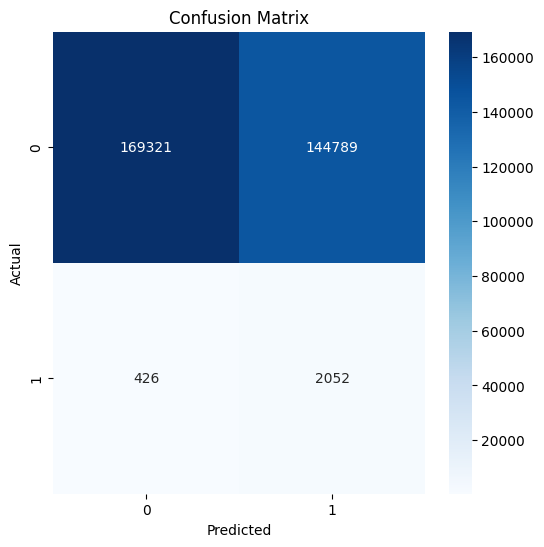

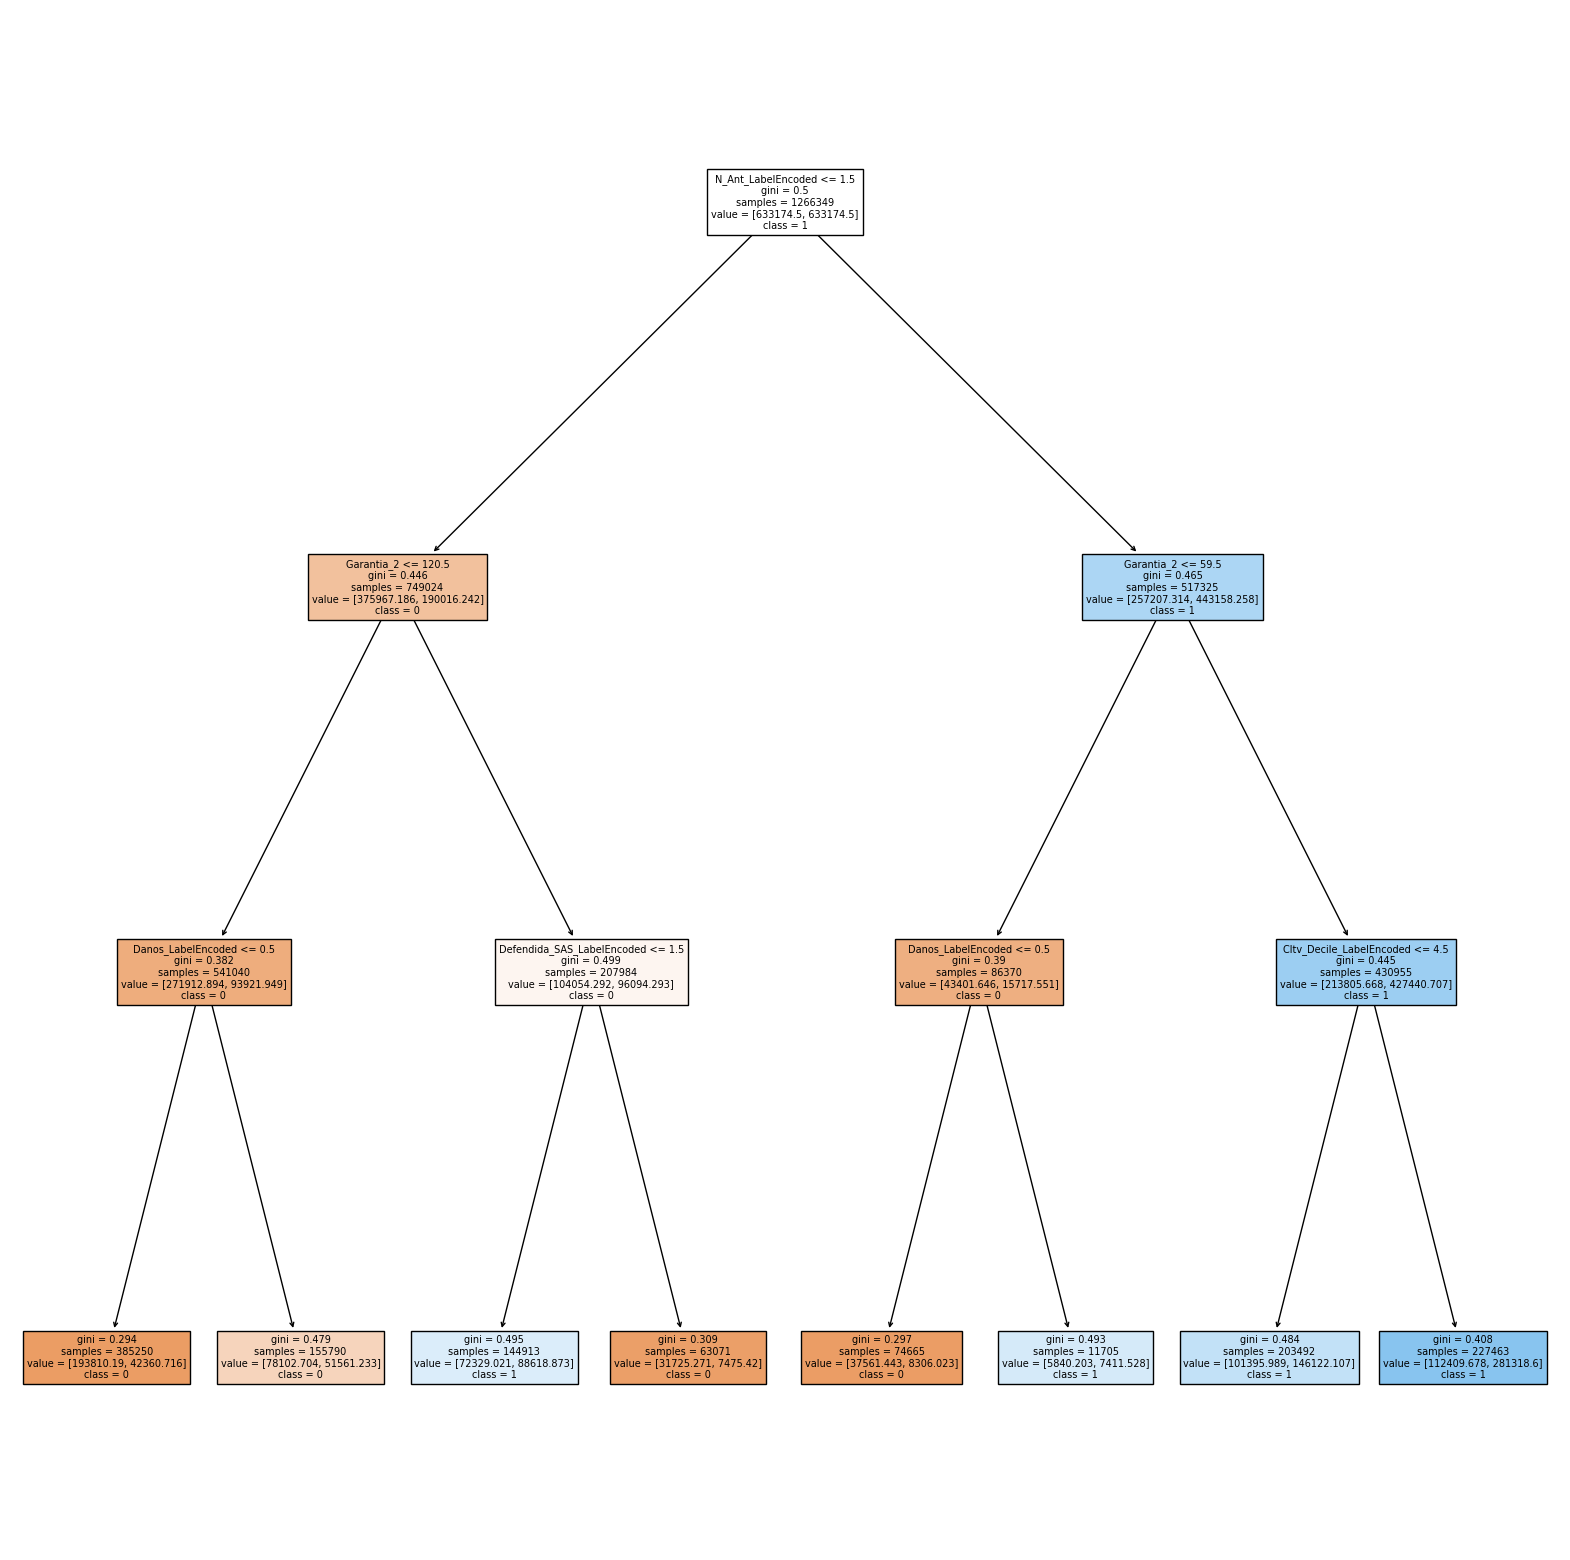

|--- N_Ant_LabelEncoded <= 1.50
|   |--- Garantia_2 <= 120.50
|   |   |--- Danos_LabelEncoded <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Danos_LabelEncoded >  0.50
|   |   |   |--- class: 0.0
|   |--- Garantia_2 >  120.50
|   |   |--- Defendida_SAS_LabelEncoded <= 1.50
|   |   |   |--- class: 1.0
|   |   |--- Defendida_SAS_LabelEncoded >  1.50
|   |   |   |--- class: 0.0
|--- N_Ant_LabelEncoded >  1.50
|   |--- Garantia_2 <= 59.50
|   |   |--- Danos_LabelEncoded <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Danos_LabelEncoded >  0.50
|   |   |   |--- class: 1.0
|   |--- Garantia_2 >  59.50
|   |   |--- Cltv_Decile_LabelEncoded <= 4.50
|   |   |   |--- class: 1.0
|   |   |--- Cltv_Decile_LabelEncoded >  4.50
|   |   |   |--- class: 1.0

Nodo: 13, Accuracy: 0.011084998041519781, F2 Score: 0.05307178756282349, AUC: 0.5, F1 Score: 0.021926936039979857
Nodo: 3, Accuracy: 0.9984584778510348, F2 Score: 0.0, AUC: 0.5, F1 Score: 0.0
Nodo: 6, Accuracy: 0.009855088556992948, F2 Score: 0.

DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=210, min_weight_fraction_leaf=0,
                       random_state=123456)

In [43]:
decision_tree_model(target = 'FRFINAL', df_selected = df_encoded_VF, df = DF, min_samples_leaf = 210, max_depth = 3)

#### Label Encoder

In [46]:
df_encoded['N_Ant'][df_encoded.N_Ant_LabelEncoded <= 1.5].value_counts()

N_Ant
1    936138
0         3
Name: count, dtype: int64

In [61]:
df_encoded['Cltv_Decile'][df_encoded.Cltv_Decile_LabelEncoded <= 4.5].unique()

array([5., 4., 2., 3., 1.])

In [ ]:
## Check

In [54]:
value_to_check = '999 - NaN'

columns_with_value = df_encoded_VF.apply(lambda column: value_to_check in column.values)

try:
    columns_with_value_true = columns_with_value[columns_with_value].index.tolist()
except ValueError:
    columns_with_value_true = columns_with_value[columns_with_value].apply(
        lambda x: np.nan if isinstance(x, str) and x != value_to_check else x
    ).dropna(how='all').index.tolist()

print(columns_with_value_true)

['Class_Anul', 'Motanul', 'Priman_New_FR', 'Defendible', 'IsBMP', 'Defendida_Ant', 'Bm_Cat']
